In [5]:
import pandas as pd
import matplotlib.pyplot as plt
train_df=pd.read_csv("/content/Titanic_train.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df=pd.read_csv("/content/Titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Check shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [8]:
#Check for missing values and data issues
print(train_df.info())
print(test_df.info())
print(train_df.isnull().sum())
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

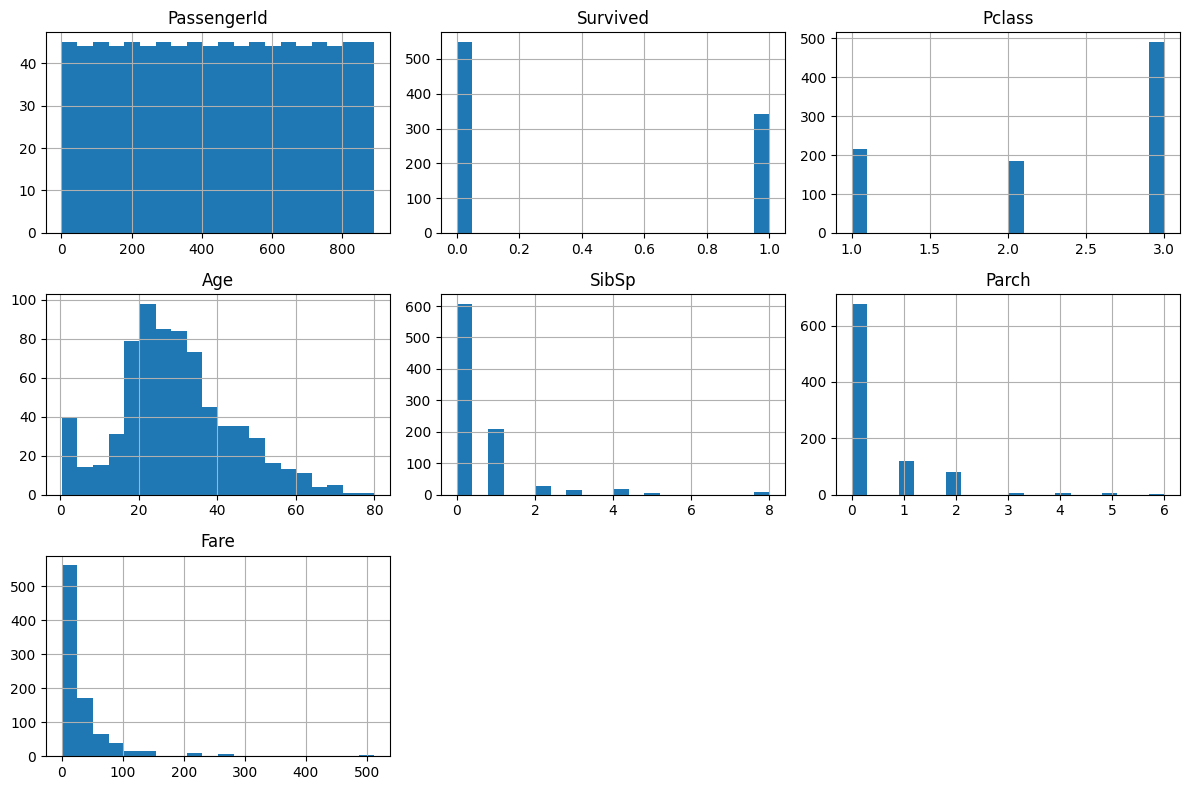

In [9]:
# Visualizations
# Histogram
train_df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


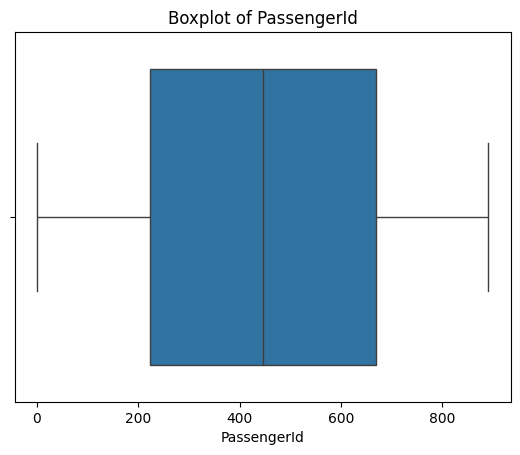

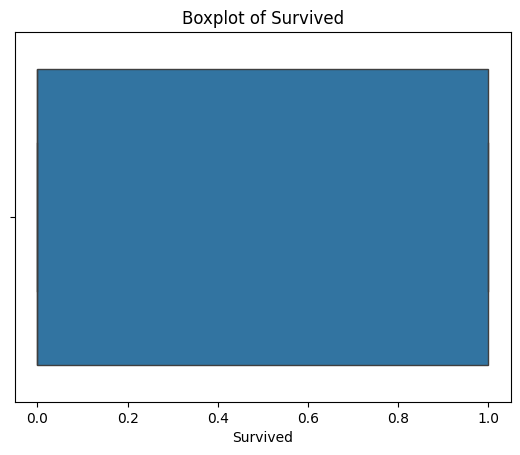

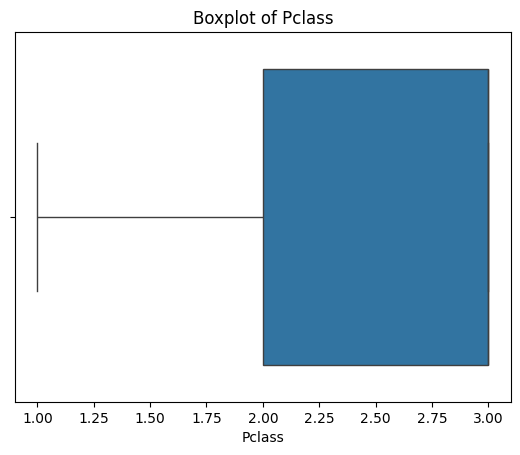

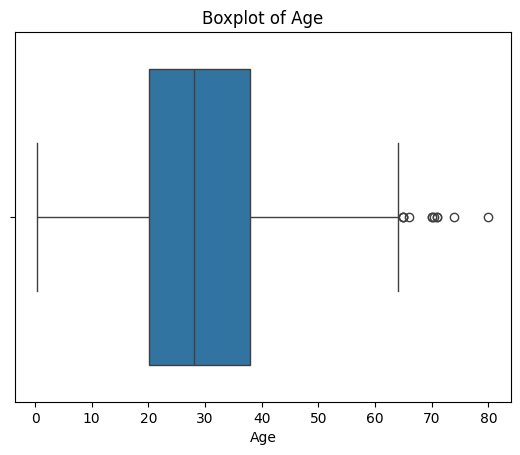

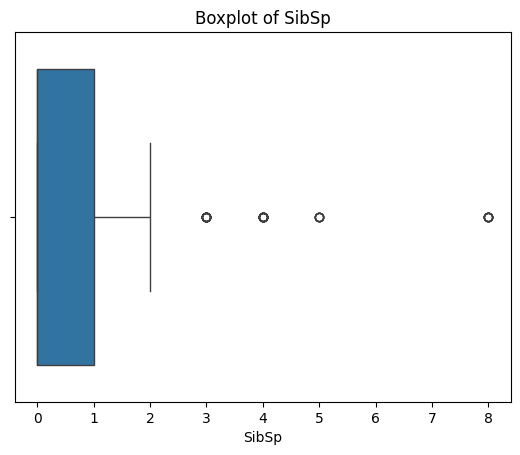

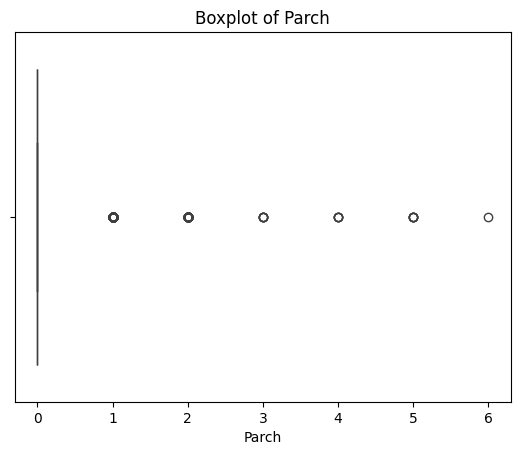

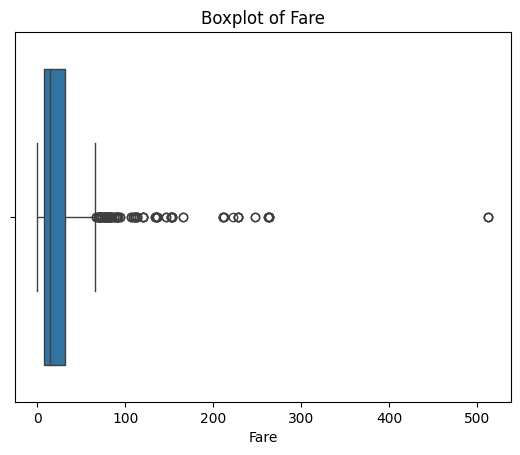

In [10]:
# Boxplots for numerical columns
import seaborn as sns
import numpy as np
num_cols = train_df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

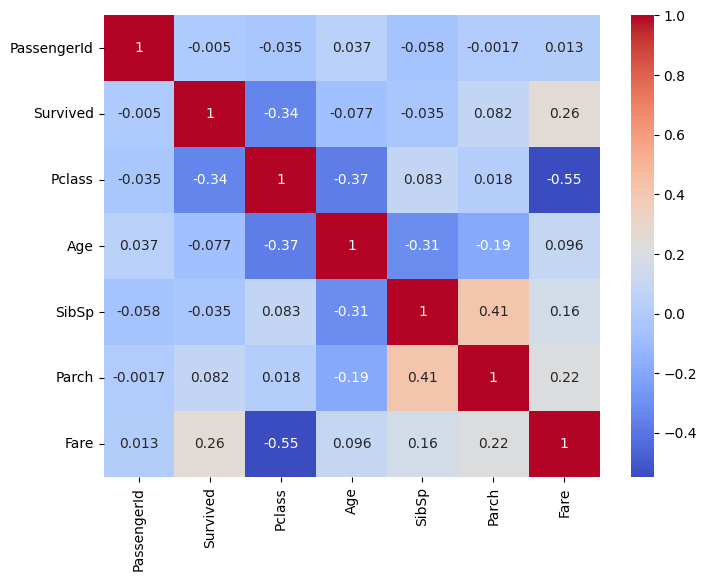

In [11]:
# Correlation heatmap
plt.figure(figsize=(8,6))
numerical_train_df = train_df.select_dtypes(include=np.number) # Select only numerical columns
sns.heatmap(numerical_train_df.corr(), annot=True, cmap="coolwarm")
plt.show()

2.DATA PREPROCESSING

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [13]:
# Separate features and target
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df # The test dataset does not have a 'Survived' column to drop
# Note: The test dataset does not have a 'Survived' column, as this is what we aim to predict.
# We only need X_test for making predictions.

In [14]:
# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(exclude=np.number).columns

In [15]:
# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [16]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
from sklearn.linear_model import LogisticRegression

# Create pipeline with preprocessing + model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Train model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

Accuracy: 0.9270482603815937
Precision: 0.9601328903654485
Recall: 0.8450292397660819
F1-score: 0.8989113530326595
ROC-AUC: 0.9804109545265713


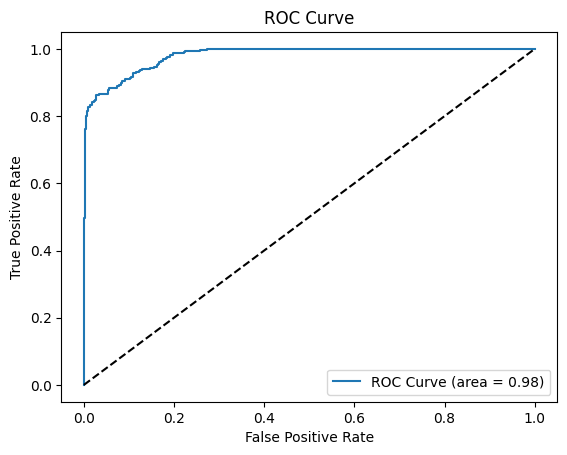

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = clf.predict(X_train)
y_pred_prob = clf.predict_proba(X_train)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision:", precision_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred))
print("F1-score:", f1_score(y_train, y_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_pred_prob))

# ROC curve
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc_score(y_train, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


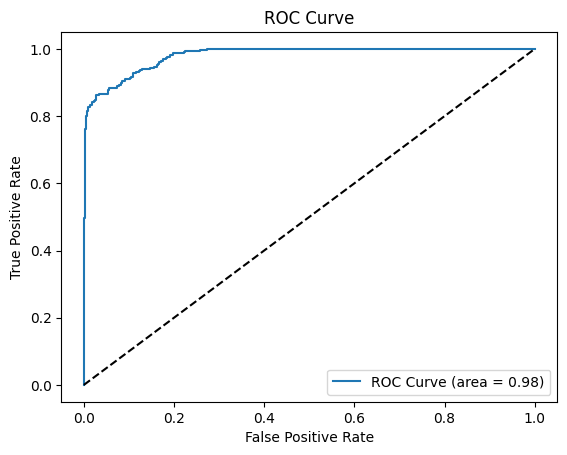

In [20]:

# ROC curve
fpr, tpr, _ = roc_curve(y_train, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % roc_auc_score(y_train, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Extract coefficients after fitting
model = clf.named_steps['model']
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                     Feature  Coefficient
979         cat__Ticket_1601     1.849758
897          cat__Sex_female     1.459361
1088        cat__Ticket_2661     1.230847
1461  cat__Ticket_C.A. 37671     1.089165
1228      cat__Ticket_347077     1.061634
...                      ...          ...
1102        cat__Ticket_2678    -0.877477
1642      cat__Cabin_C22 C26    -0.897179
1294      cat__Ticket_349909    -0.935178
1232      cat__Ticket_347082    -1.075410
898            cat__Sex_male    -1.408940

[1730 rows x 2 columns]


Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?


Precision measures how many of the predicted positives were actually positive.


Formula:
  
  p=tp/tp+fp

High precision → few false positives.


Recall measures how many of the actual positives were correctly predicted.


Formula:


R=tp/tp+fn

high recall → few false negatives

Key difference: Precision focuses on accuracy of positive predictions, recall focuses on completeness of capturing positives.




Cross-validation is a model evaluation technique where the training data is split into multiple subsets (folds). The model is trained on some folds and validated on the remaining fold(s), repeating this process for each fold.

Purpose:

Gives a more reliable estimate of model performance by testing on multiple data splits.

Reduces risk of overfitting to one particular train/test split.

Ensures the model’s performance is consistent across different subsets of data.

In binary classification, it’s especially useful because:

It balances the evaluation when one class is rarer (class imbalance).

It ensures the performance metrics like precision, recall, and ROC-AUC are not biased by a single random split.

In [31]:
import joblib

In [32]:
joblib.dump(clf, 'titanic_model.pkl')

['titanic_model.pkl']

In [33]:
from google.colab import files
files.download('titanic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
app_code = """
from flask import Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, Google Colab!"

if __name__ == '__main__':
    app.run()
"""


In [35]:
with open('app.py', 'w') as f:
    f.write(app_code)


In [36]:
!ls

app.py	      model.pkl    titanic_model.pkl  Titanic_train.csv
model.joblib  sample_data  Titanic_test.csv


In [37]:
!python app.py

 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
c
^C


In [38]:
pip install streamlit joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.110.157:8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://tricky-mirrors-drive.loca.lt
